In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import os
import cv2
from tqdm import tqdm

In [2]:
DATADIR = "C:\\Users\\PRITAM VERMA\\Desktop\\CNN EXPRESSION"
CATEGORIES = ["angry", "disgust","fear","happy","neutral","sad","surprise"]

In [14]:
IMG_SIZE  = 50
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))

In [15]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|█████████████████████████████████████████████████████████████████████████████| 3205/3205 [00:17<00:00, 179.79it/s]


28821


In [17]:
import random
random.shuffle(training_data)

In [21]:
for sample in training_data[:20]:
    print(sample[1])

3
0
4
4
0
1
6
4
0
0
0
4
3
4
4
3
4
4
2
3


In [22]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)

In [23]:
X.shape

(28821, 50, 50, 1)

In [27]:
y[:10]

array([3, 0, 4, 4, 0, 1, 6, 4, 0, 0])

In [30]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [31]:
X.dtype

dtype('uint8')

In [32]:
y.dtype

dtype('int32')

In [33]:
# Normalizing the traning data
X = X/255.0

In [45]:
# Traning the Data
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,MaxPooling2D,Conv2D,Flatten
from tensorflow.keras.layers import Dropout,BatchNormalization

In [46]:
model = Sequential()

#First Convolution layer
model.add(Conv2D(64, (3,3), activation="relu", input_shape = X.shape[1:]))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

#Second Convolution layer
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

#Third Convolution layer
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

#Flattning the layer
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.10))

#Output layer
model.add(Dense(7, activation="softmax"))

In [47]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer = "adam", 
              metrics=["accuracy"])

In [48]:
model.fit(X,y,epochs=12, batch_size = 36,validation_split=0.1)

Epoch 1/12
721/721 [==============================] - 168s 231ms/step - loss: 1.6216 - accuracy: 0.3678 - val_loss: 1.5708 - val_accuracy: 0.3833
Epoch 2/12
721/721 [==============================] - 161s 223ms/step - loss: 1.3851 - accuracy: 0.4686 - val_loss: 1.7295 - val_accuracy: 0.3295
Epoch 3/12
721/721 [==============================] - 156s 216ms/step - loss: 1.2744 - accuracy: 0.5140 - val_loss: 1.4561 - val_accuracy: 0.4162
Epoch 4/12
721/721 [==============================] - 156s 217ms/step - loss: 1.1888 - accuracy: 0.5474 - val_loss: 1.2777 - val_accuracy: 0.5075
Epoch 5/12
721/721 [==============================] - 145s 201ms/step - loss: 1.1153 - accuracy: 0.5720 - val_loss: 1.3090 - val_accuracy: 0.5082
Epoch 6/12
721/721 [==============================] - 144s 199ms/step - loss: 1.0473 - accuracy: 0.6043 - val_loss: 1.3615 - val_accuracy: 0.4780
Epoch 7/12
721/721 [==============================] - 144s 200ms/step - loss: 0.9772 - accuracy: 0.6303 - val_loss: 1.2510 -

<AxesSubplot:>

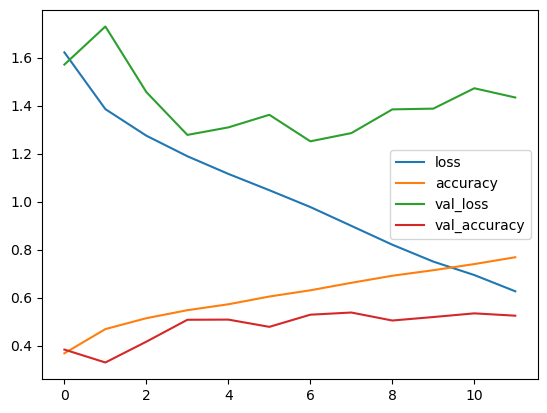

In [49]:
import pandas as pd
loss = pd.DataFrame(model.history.history)
loss.plot()

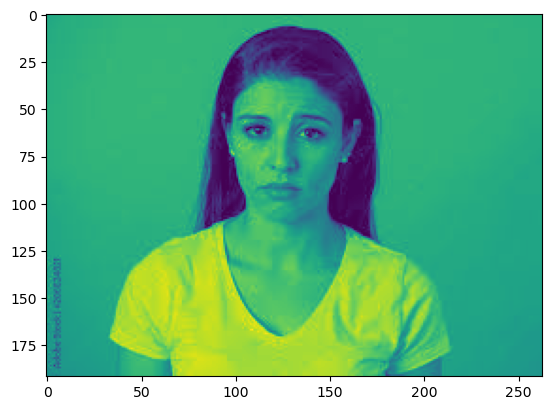

In [62]:
test_img = cv2.imread("C:\\Users\\PRITAM VERMA\\Desktop\\sad2.jfif",cv2.IMREAD_GRAYSCALE)
plt.imshow(test_img)

In [63]:
test_image = cv2.resize(test_img,(IMG_SIZE,IMG_SIZE))
final_img = test_image.reshape(1,IMG_SIZE,IMG_SIZE,1)

#Final prediction 
prediction = model.predict(final_img)
prediction

1/1 [==============================] - 0s 29ms/step


array([[0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [64]:
# ["angry", "disgust","fear","happy","neutral","sad","surprise"]

### OKAY! This model does not perform well so we need to improve the model.
### Reasions behind this performance:-
#### 1. Data was not sufficiant 
#### 2. Data size was not same for each expression
#### 3. Model can be trained in better way.